In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from pprint import pprint
sns.set()

In [2]:
# load the data
df = pd.read_csv('debate_transcripts_v2_2020-02-23.csv',encoding='cp1252')

I'd like to answer the question, who spent the most time talking about each subject during the democratic primary debates.

### Exploring the Data

In [3]:
df.shape

(5333, 5)

In [3]:
# prints top 10 entries
df.head(10)

,debate_name,debate_section,speaker,speech,speaking_time_seconds
0,New Hampshire Democratic Debate Transcript,Part 1,George S.,"Candidates, welcome. Vice President Biden, the...",18.0
1,New Hampshire Democratic Debate Transcript,Part 1,Joe Biden,"Oh, they didn’t miss anything. It’s a long rac...",36.0
2,New Hampshire Democratic Debate Transcript,Part 1,George S.,Why are Senator Sanders and Mayor Buttigieg to...,4.0
3,New Hampshire Democratic Debate Transcript,Part 1,Joe Biden,"Well, you know that with regard to Senator San...",41.0
4,New Hampshire Democratic Debate Transcript,Part 1,George S.,"Senator Sanders, let me give you the chance to...",21.0
5,New Hampshire Democratic Debate Transcript,Part 1,Bernie Sanders,Because Donald Trump lies all the time. It doe...,41.0
6,New Hampshire Democratic Debate Transcript,Part 1,Bernie Sanders,I believe that the way we beat Trump is by hav...,39.0
7,New Hampshire Democratic Debate Transcript,Part 1,George S.,"But Senator, let me follow up there and then w...",12.0
8,New Hampshire Democratic Debate Transcript,Part 1,Bernie Sanders,That’s true. And that’s the disappointment and...,23.0
9,New Hampshire Democratic Debate Transcript,Part 1,George S.,"Before I move on to Mayor Buttigieg, let me ju...",11.0


Here we look for missing entries. Since I'm asking the question, who spent the most time on what topics, it is necessary that speaking_time is filled in.

In [4]:
# now to look for missing entries
df.isna().sum(axis=0)

debate_name                0
debate_section             0
speaker                    0
speech                     0
speaking_time_seconds    513
dtype: int64

There are 513 missing values. Since I want to ask which candidate spent the most time talking about which topics, I cannot use these rows and they should be removed. Now let's take a look at the remaining distribution.

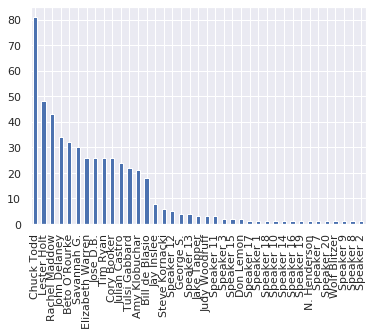

In [5]:
# There are 513 values, it seems like there's also something going on
# with breaks, I see the phrase 'short break', a lot.
# hist() with categorical data didn't work well, so use value_counts
# instead and use a bar plot
df[df.isna().any(axis=1)]['speaker'].value_counts().plot(kind='bar')

A significant fraction of these entries come from moderators/anchors: Chuck Todd, Lester Holt, Rachel Maddow, etc. Removing these entries should have little effect on the data, except in the cases of Elizabeth Warren and Tulsi Gabbard.

The next question to answer is why don't these entries have speaking time.


In [7]:
# selects data frame where NaN speaking time and chuck todd is the speaker .speaker.isin(['Chuck Todd'])
df[df.isna().any(axis=1)]['speech']

153     We have much more today coming up, but we have...
322     Candidates. Thank you. Thanks for a great deba...
669     Candidates, thank you very, very much. That co...
826     We’re going to take a short break and we will be…
1030    We are going to take a very short break. That ...
                              ...                        
4807    But I got my chance. It was a 50 dollar a seme...
4808    We would like to thank all of the candidates t...
4809    We certainly hope you will join us then. But f...
5075                      Mayor Buttigieg, your thoughts.
5332    For now, for all of us at NBC News, I’m Lester...
Name: speech, Length: 513, dtype: object

It appears that a significant portion of these entries are due to commercial breaks and are safe to remove.

In [1108]:
# drop the NaN entries
df.dropna(inplace=True)

In [1109]:
df.isna().sum() # all clear!

level_0                  0
index                    0
debate_name              0
debate_section           0
speaker                  0
speech                   0
speaking_time_seconds    0
dtype: int64

The next question is what do we do with the moderator questions?
For simplicity, I'm going to throw out everyone I don't care about. Here, I'm going to focus on candidates who made it to the first primary vote:

Bernie Sanders, Elizabeth Warren, Amy Klobuchar,Pete Buttigieg, 
Joe Biden, Tulsi Gabbard, Michael Bloomberg

In [13]:
print(sorted(set(df['speaker'])))

['A. Cooper', 'Abby Phillips', 'Adam Sexton', 'Amna Nawaz', 'Amy Klobuchar', 'Amy Walter', 'Anderson Cooper', 'Andrea Mitchell', 'Andrew Yang', 'Announcer', 'Ashley Parker', 'Audience', 'B. Pfannenstiel', 'Bennett', 'Bernie Sanders', 'Beto O’Rourke', 'Bill de Blasio', 'Brianne P.', 'Chuck Todd', 'Cory Booker', 'Crowd', 'Dana Bash', 'David Muir', 'Devin Dwyer', 'Diana', 'Don Lemon', 'Elizabeth Warren', 'Eric Stalwell', 'Eric Swalwell', 'Erin Burnett', 'Female', 'George S.', 'Hallie Jackson', 'Helen', 'J. Hickenlooper', 'Jake Tapper', 'Jay Inslee', 'Joe Biden', 'John Delaney', 'John H.', 'John Hickenloop', 'John King', 'Jon Ralston', 'Jorge Ramos', 'Jose D.B.', 'Judy Woodruff', 'Julian Castro', 'Kamala Harris', 'Kirseten Gillibrand', 'Kirsten Gillibrand', 'Kristen Welker', 'Lester Holt', 'Linsey Davis', 'Male', 'Marc Lacey', 'Marianne Williamson', 'Michael Bennet', 'Michael Bloomberg', 'Moderator', 'Moderator 1', 'Moderator 2', 'Moderator 4', 'Monica Hernandez', 'N. Henderson', 'Pete But

In [14]:
# select for the people we want
selector = ['Amy Klobuchar','Bernie Sanders', 'Elizabeth Warren','Joe Biden','Michael Bloomberg','Pete Buttigieg','Tulsi Gabbard']

In [15]:
df = df[df.speaker.isin(selector)] # only keep the relevant candidates

In [ ]:
df.reset_index(inplace=True) # resets the index now that we've dropped columns

In [1111]:
df.head()

,level_0,index,debate_name,debate_section,speaker,speech,speaking_time_seconds
0,0,1,New Hampshire Democratic Debate Transcript,Part 1,Joe Biden,"Oh, they didn’t miss anything. It’s a long rac...",36.0
1,1,3,New Hampshire Democratic Debate Transcript,Part 1,Joe Biden,"Well, you know that with regard to Senator San...",41.0
2,2,5,New Hampshire Democratic Debate Transcript,Part 1,Bernie Sanders,Because Donald Trump lies all the time. It doe...,41.0
3,3,6,New Hampshire Democratic Debate Transcript,Part 1,Bernie Sanders,I believe that the way we beat Trump is by hav...,39.0
4,4,8,New Hampshire Democratic Debate Transcript,Part 1,Bernie Sanders,That’s true. And that’s the disappointment and...,23.0


Now that we have our chosen candidates, I want to ensure that I use data from candidates who have enough time to actually say something. Candidates can and do get interupted by both moderators and other candidates.

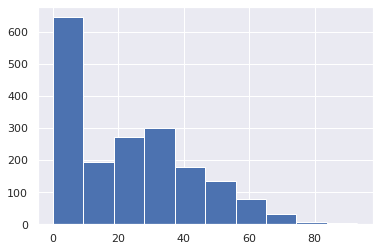

In [18]:
df['speaking_time_seconds'].hist()

There are a lot of entries with < 10 seconds. Now let's look at those entries to see when topics start appearing. I start with a lower threshold of 2 seconds, and an upper threshold of 5 seconds. I realized that many of these entries ended with a dash '-', indicating that the speaker got cutoff or interrupted. I then selected for this.

In [19]:
# Looking for who is interrupting!
selector = (df['speaking_time_seconds']<5) & (df['speaking_time_seconds']>2)
df[selector]['speech'][df[selector]['speech'].str.endswith("-")]

1561                            I want to give a reality-
1727    What we owe to those survivors is to actually ...
1755    We’ve got to attack the corruption and repeal ...
1796          That is why we need a political revolution-
1817    I’d like to ask our other candidates this ques...
1858       … why it is that we have had laws on the book-
1948    You’ve got to take on the greed and the profit...
1976    … had to fight against people in his own admin...
3134    And it’s not nearly enough. [crosstalk 00:16:1...
3242    Donald Trump wants to use these people as poli...
3281                 And when 90% of Americans to happen-
3454    And I truly believe that if we’re going to mov...
3587    Four little girls in Birmingham, Alabama lost ...
4170    I reject the premise that there’s only one or ...
4174    We need a political revolution. People have go...
4220    If the government wants to do that, if people ...
4850                        That’s just not true. People-
4959    It jus

Exploring this data, we can see a good example of a speaker getting interrupted, Pete Buttigieg. The indicies are 773-775, and it is just him talking while getting interrupted. The person who interrupted him got removed by dropping the NaN values.

The key to linking statements should be if the same speaker is speaking in adjacent indicies (or maybe) every other, and the previous statement ends with '-' and the next statement starts with '...', stitch them together.

In [1112]:
print(df.loc[773]['speech'])
print(df.loc[774]['speech'])
print(df.loc[775]['speech'])

But I think at the end of the day what I appreciate is that we have got to end the hatred that Trump is fostering on our people, the divisiveness, trying to divide us up by the color of our skin or where we were born or our sexual orientation or our religion, and there is no job that I would undertake with more passion than bringing our people together around an agenda that works for every man, woman, and child in this country rather than the corporate elite and the 1%. A progressive agenda that stands for all is the way that we transform this country.
You asked about a surprising friend. For me, it would be Charles Fried. 27 years ago when I was under consideration for a job, he was someone who had been George Bush, the first solicitor general, a deeply principled Republican. And we didn’t agree on much. I was far more liberal than he was, but he also was willing to listen to my work about what’s happening to America’s middle class. And Charles engaged with it over and over and ultima

Define a merge function.

In [1113]:
def merge_speaking(df,indicies):
    '''
    df: a copy of the supplied dataframe 
    indicies: a list of that want to add together, accesible by iloc
    '''
    clean_strs = ''
    total_time = 0
    
    for i in indicies:

        # clean the strings
        tmp = (re.sub('-$','',df.loc[i]['speech']))
        tmp = re.sub('^\u2026','',tmp)
        total_time = total_time + df.loc[i]['speaking_time_seconds']
        clean_strs = clean_strs + tmp
    
    # drop the extra rows
    df = df.drop(indicies[1:])
    df.loc[indicies[0],'speech'] = clean_strs
    df.loc[indicies[0],'speaking_time_seconds'] = total_time
    return df
        

In [1114]:
# Test case
merge = [773,774,775]
p = merge_speaking(df,merge)
print(p.loc[773]['speech'])

But I think at the end of the day what I appreciate is that we have got to end the hatred that Trump is fostering on our people, the divisiveness, trying to divide us up by the color of our skin or where we were born or our sexual orientation or our religion, and there is no job that I would undertake with more passion than bringing our people together around an agenda that works for every man, woman, and child in this country rather than the corporate elite and the 1%. A progressive agenda that stands for all is the way that we transform this country.You asked about a surprising friend. For me, it would be Charles Fried. 27 years ago when I was under consideration for a job, he was someone who had been George Bush, the first solicitor general, a deeply principled Republican. And we didn’t agree on much. I was far more liberal than he was, but he also was willing to listen to my work about what’s happening to America’s middle class. And Charles engaged with it over and over and ultimat

Define a function to get the indices whuch need to be merged

In [32]:
def get_merge_indicies(df,speaker):
    indices = []
    tmp = []
    interrupted = False
    for i,row in df[df['speaker']==speaker].iterrows():
        if (not interrupted) and (row['speech'].endswith('-')):
            interrupted = True
            tmp.append(i)

        elif interrupted and row['speech'].startswith('\u2026'):
            tmp.append(i)
            if not row['speech'].endswith('-'):
                indices.append(tmp)
                tmp = []
                interrupted = False
        else:
            interrupted = False
            if len(tmp) > 0:
                if len(tmp) > 1:
                    indices.append(tmp)
                tmp = []
    
    return indices

In [33]:
# get the indices which need appending
speakers = ['Amy Klobuchar','Bernie Sanders', 'Elizabeth Warren','Joe Biden','Michael Bloomberg','Pete Buttigieg','Tulsi Gabbard']
all_indices = []
for speaker in speakers:
    speaker_indices = get_merge_indicies(df,speaker)
    all_indices.append(speaker_indices)

[[137, 138], [793, 794], [843, 844], [850, 852], [888, 889], [1022, 1023], [1218, 1219], [1270, 1271], [1318, 1319], [1815, 1816]]


In [34]:
for idxs in all_indices:
    print(idxs)
    for merge in idxs:
        df = merge_speaking(df,merge)
        #print(p.loc[merge[0]]['speech'])

[[769, 770], [823, 824, 825], [881, 882], [1215, 1216], [1282, 1283, 1284], [1315, 1316], [1323, 1324], [1784, 1785, 1787], [1791, 1793, 1795], [1821, 1822]]
[[137, 138], [793, 794], [843, 844], [850, 852], [888, 889], [1022, 1023], [1218, 1219], [1270, 1271], [1318, 1319], [1815, 1816]]
[[738, 739], [740, 741], [781, 782], [783, 784], [811, 812, 813], [819, 820], [857, 858, 859], [866, 867, 869, 870], [1181, 1182], [1223, 1224], [1264, 1265, 1266], [1267, 1268], [1336, 1337, 1338], [1628, 1630], [1773, 1775], [1808, 1809]]
[[1122, 1123], [1491, 1492], [1840, 1841, 1842, 1843]]
[[1804, 1805]]
[[330, 331], [752, 753], [756, 757], [773, 774, 775], [776, 777], [834, 835], [875, 876], [1006, 1007], [1230, 1231, 1233], [1277, 1278], [1288, 1289], [1330, 1331], [1790, 1792, 1794], [1796, 1798], [1829, 1830]]
[[805, 806]]


Let's look at whether anything of substance is said in less than one second...

In [35]:
selector = df['speaking_time_seconds'] < 1
df[selector]['speech']

27                                 70 is the new 50.
30                            George, George, can I…
53                                    Let’s do that.
66                                              Yes.
95                          Let’s get that straight.
                            ...                     
1758                                  May I respond?
1766    Can I respond to the Vice President, please?
1789                                           Just-
1797                             You know what Pete?
1824                                      Thank you.
Name: speech, Length: 113, dtype: object

In [36]:
df = df[~selector]

Looks like anything left are short, cute sentences that don't have much content. These can be safely removed as they aren't long enough for topics.

In [37]:
selector = (df['speaking_time_seconds'] <2)
df[selector]['speech']

5                                                I’m not.
41                   I wasn’t able to hear that question.
50                                           There we go.
93           We ought to be able to sue the gun industry.
113                     I don’t think that’s quite right.
                              ...                        
1811                                   Play by the rules.
1813                   Not necessarily. Not till there’s-
1814                                Let the process work.
1817                                                 Yes.
1818    … who has the most votes should become the nom...
Name: speech, Length: 138, dtype: object

Seems like it's okay to remove these too.

In [38]:
df = df[~selector]

In [39]:
df.reset_index(inplace=True) # resets the index now that we've dropped columns

In [40]:
#pandas reset index seems to keep level_0?
df

,level_0,index,debate_name,debate_section,speaker,speech,speaking_time_seconds
0,0,1,New Hampshire Democratic Debate Transcript,Part 1,Joe Biden,"Oh, they didn’t miss anything. It’s a long rac...",36.0
1,1,3,New Hampshire Democratic Debate Transcript,Part 1,Joe Biden,"Well, you know that with regard to Senator San...",41.0
2,2,5,New Hampshire Democratic Debate Transcript,Part 1,Bernie Sanders,Because Donald Trump lies all the time. It doe...,41.0
3,3,6,New Hampshire Democratic Debate Transcript,Part 1,Bernie Sanders,I believe that the way we beat Trump is by hav...,39.0
4,4,8,New Hampshire Democratic Debate Transcript,Part 1,Bernie Sanders,That’s true. And that’s the disappointment and...,23.0
...,...,...,...,...,...,...,...
1520,1839,5317,"Democratic Debate Transcript: Las Vegas, Nevad...",Part 2,Joe Biden,"Lastly, I think it’s important that on day one...",13.0
1521,1840,5320,"Democratic Debate Transcript: Las Vegas, Nevad...",Part 2,Joe Biden,"Had, in fact, that immigration bill passed the...",5.0
1522,1844,5328,"Democratic Debate Transcript: Las Vegas, Nevad...",Part 2,Bernie Sanders,"Unfortunately Rulac, among other groups, Latin...",17.0
1523,1845,5329,"Democratic Debate Transcript: Las Vegas, Nevad...",Part 2,Bernie Sanders,"But where we don’t agree, I think, is why we a...",24.0


In [41]:
selector = df['speaking_time_seconds']<3
df[selector]['speech'].iloc[10]

'… getting rid of the oil giveaways …'

I'm starting to see words like 'oil' and 'immigration'. These statements need to be kept.

In [ ]:
# creating sub dataframes
biden = df[df['speaker'] == 'Joe Biden']
sanders = df[df['speaker'] == 'Bernie Sanders']
klobuchar = df[df['speaker'] == 'Amy Klobuchar']
warren = df[df['speaker'] == 'Elizabeth Warren']
buttigieg = df[df['speaker'] == 'Pete Buttigieg']
gabbard = df[df['speaker'] == 'Tulsi Gabbard']
bloomberg = df[df['speaker'] == 'Michael Bloomberg']

Topic Modelling is a technique to extract hidden topics from a large body of text. The challenge presents itself with how to extract a good number of topics. Ones which are distinct and meaningful.

There are a couple topic modelling algorithms:

LDA - Latent Dirichlet Allocation. This interprets a document as a collection of topics at some proportion. The topics are considered a collection of dominant keywords at some proportion.

### Preprocessing the Data

Remove Stopwords, tokenize, lemmitize, make bigrams and trigrams

In [287]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [302]:
import spacy

In [46]:
# plotting tools
import pyLDAvis
import pyLDAvis.gensim

#### Remove Stopwords

Stopwords are words which have no meaning. These words are removed from the list of words we use for analysis. There are standard lists of stopwords. I am using a list provided by the natural language processing toolkit (nltk).

Extended stop words are words I've chosen to remove, in addition to the standard dictionary I'm using. These words are chosen in order to create higher quality topics.

In [ ]:
# stopwords filter out words which make the topics have low quality
from nltk.corpus import stopwords

In [1082]:
# load the stopwords and add some of my own
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','question','time','things','thing'])

#### Tokenization
Here I need to break up the setences into a list of individual words. This means I need to expand contractions, remove puncuation, and remove weird characters in the text.

In [50]:
data = df.speech.tolist()
# remove ellipses
data = [re.sub('\u2026', '', sentence) for sentence in data]   

Next we need to remove things like '[crosstalk ##:##:##]' or '[inaudible ##:##:##]'

In [51]:
data = [re.sub('.crosstalk [0-9][0-9]:[0-9][0-9]:[0-9][0-9]..','',sentence) for sentence in data]
data = [re.sub('.inaudible [0-9][0-9]:[0-9][0-9]:[0-9][0-9]..','',sentence) for sentence in data]

In [261]:
# cp1252 to unicode encoding for the apostrophe
data = [re.sub("\u2019","\u0027",sentence) for sentence in data]

##### Expand contractions

In [53]:
from pycontractions import Contractions
import gensim.downloader as api

In [109]:
# model for contractions function
model = api.load("word2vec-google-news-300")

KeyboardInterrupt: 

In [55]:
cont = Contractions(kv_model=model)

In [56]:
# prevents loading on first expand_texts call
cont.load_models()

In [263]:
# expand contractions
data = list(cont.expand_texts(data,precise=True))

#### Tokenize

In [269]:
def tokenize(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [272]:
token_sentences = list(tokenize(data))

#### Building Bigrams and Trigrams

In [926]:
bigram = gensim.models.Phrases(token_sentences, min_count=5,threshold=100)
trigram = gensim.models.Phrases(bigram[token_sentences],threshold=100)

In [927]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [928]:
# necessary functions
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ', 'PROPN']):
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out  

In [1083]:
# remove stopwords
nostops = remove_stopwords(token_sentences)

In [1084]:
# make bigrams and trigrams
bigrams = make_bigrams(nostops)
trigrams = make_trigrams(nostops)

In [1085]:
nlp = spacy.load('en', disable=['parser','ner'])

In [1086]:
# lemmatize
lemmatized = lemmatization(trigrams)

In [1087]:
# Create Dictionary
id2word = corpora.Dictionary(lemmatized)

# Create Corpus
texts = lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

# mapping (word_id, word_frequency)
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]]


In [1088]:
id2word[0] # dictionary usage

'bernie'

### Train the Model

Training the LDA model. The number of topics was chosen based on a balance between maximizing the coherence, and eyeballing topics such that they make sense.

In [1101]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6,
                                           random_state=200,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [1115]:
# print the topics and 10 most associated words
pprint(lda_model.print_topics())

[(0,
  '0.027*"war" + 0.023*"wealth" + 0.015*"military" + 0.014*"afghanistan" + '
  '0.011*"iraq" + 0.011*"world" + 0.010*"ally" + 0.010*"cannot_afford" + '
  '0.009*"troop" + 0.009*"street"'),
 (1,
  '0.048*"people" + 0.025*"country" + 0.023*"president" + 0.015*"way" + '
  '0.015*"year" + 0.012*"right" + 0.012*"america" + 0.012*"american" + '
  '0.011*"fact" + 0.009*"plan"'),
 (2,
  '0.029*"job" + 0.023*"worker" + 0.021*"company" + 0.017*"top" + '
  '0.014*"government" + 0.014*"republicans" + 0.011*"fight" + 0.009*"choice" + '
  '0.009*"implication" + 0.009*"democratic"'),
 (3,
  '0.027*"issue" + 0.027*"world" + 0.023*"job" + 0.014*"agreement" + '
  '0.013*"member" + 0.012*"long" + 0.011*"climate" + 0.011*"climate_change" + '
  '0.010*"new" + 0.010*"mother"'),
 (4,
  '0.021*"college" + 0.020*"majority" + 0.019*"future" + 0.018*"education" + '
  '0.013*"law" + 0.013*"race" + 0.013*"teacher" + 0.012*"kid" + '
  '0.012*"making_sure" + 0.011*"easy"'),
 (5,
  '0.043*"union" + 0.010*"proud"

##### Topic 1: Military
war, wealth, military, afghanistan, iraq, world, ally, cannot afford, troop, street

##### Topic 2: The American People
people, country, president, way, year, right, america, american, fact, plan

##### Topic 3: Jobs
job, worker, company, top, government, republicans, fight, choice, implication, democratic

##### Topic 4: Global Issues
issue, world, job, agreement, member, long, climate, climate change, new, mother

##### Topic 5: The Future of Education
college, majority, future, education, law, race, teacher, kid, making sure, easy

##### Topic 6: The Need to Vote
union, proud, delegate, movement, name, strong, leader, month, poll, arena

In [1103]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))

Perplexity:  -7.483680466877554


In [1104]:
# Compute Coherence
coherence_model = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word,coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4144044396626301


#### Visualization

In [1105]:
pyLDAvis.enable_notebook()

In [1106]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

In [1107]:
# opens new pop up, pyLDAvis was written for IPython 
# and does not display well in jupyter notebook
viz = pyLDAvis.show(vis)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [10/Mar/2020 12:31:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 12:31:53] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 12:31:53] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Mar/2020 12:31:53] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


Next steps:

Find a way to associate the words of each individual speaker with the topics defined here.

Ideas:

(1) Look for the frequency of the strongest words per topic

(2) Turn this into a supervised classification problem

### Things that could be improved

If I wanted to keep more of the data, I could potentially analyze the number of works spoken for those missing speaking_time entries and estimate how much times is taken up by those sections using the average words spoken.

No need to stitch together passages or remove speeches less than 2 seconds. Unimportant content can be dropped with stopwords.

Keep moderator questions. If I kept moderator questions, I could ask more questions about whether the candidate avoided the question.